In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


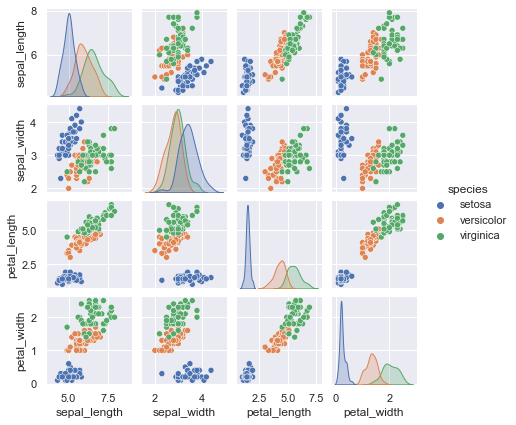

In [6]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [7]:
X_iris = iris.drop('species', axis=1)

In [8]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_iris.shape

(150, 4)

In [10]:
y_iris = iris['species']

In [11]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
y_iris.shape

(150,)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

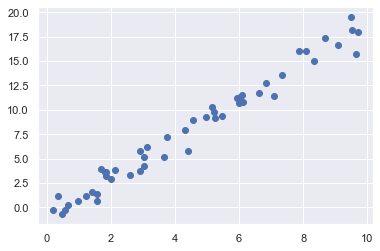

In [23]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression(fit_intercept=True)

In [27]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [31]:
model.fit(X, y)

LinearRegression()

In [32]:
model.coef_

array([1.9776566])

In [33]:
model.intercept_

-0.9033107255311146

In [36]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

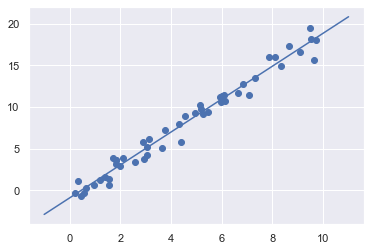

In [38]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris)

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ymodel)

0.9473684210526315

In [44]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/home/bencode/miniconda3/envs/p3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


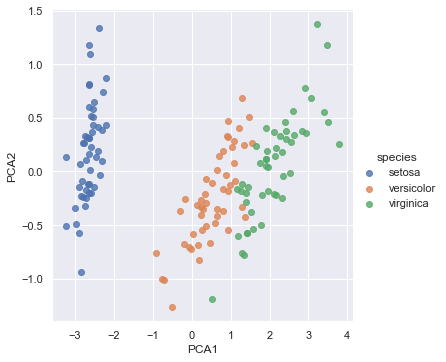

In [46]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

In [49]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
           covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

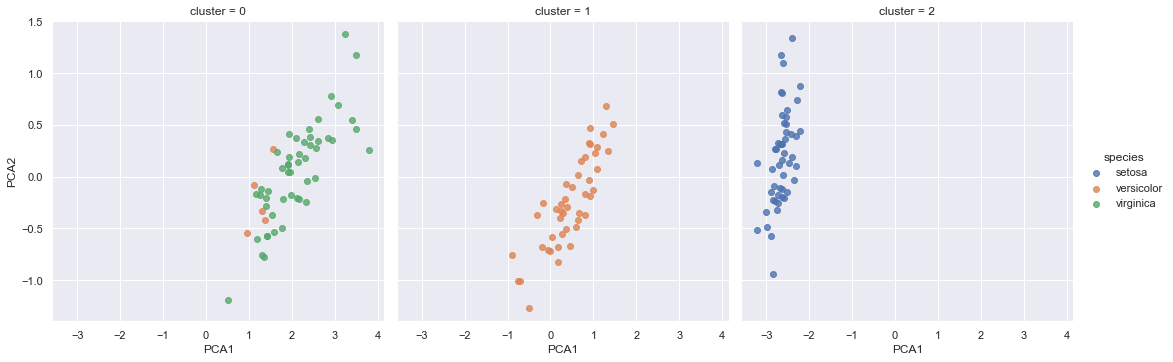

In [51]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species',
          col='cluster', fit_reg=False)

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

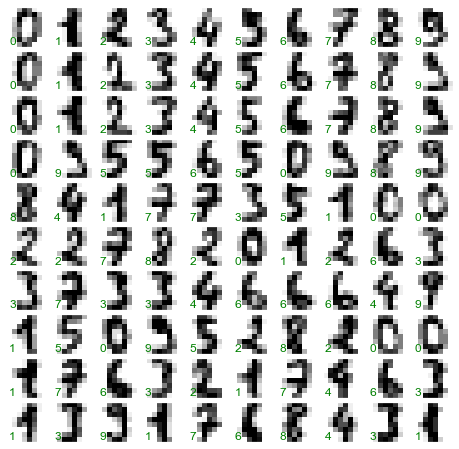

In [54]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',
              interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [55]:
X = digits.data
X.shape

(1797, 64)

In [56]:
y = digits.target
y.shape

(1797,)

In [57]:
from sklearn.manifold import Isomap

In [59]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

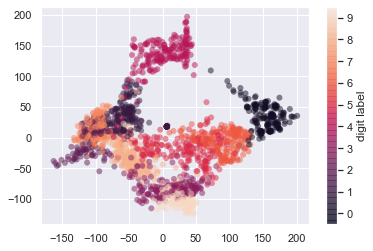

In [61]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c=digits.target,
           edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

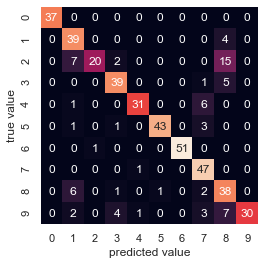

In [66]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

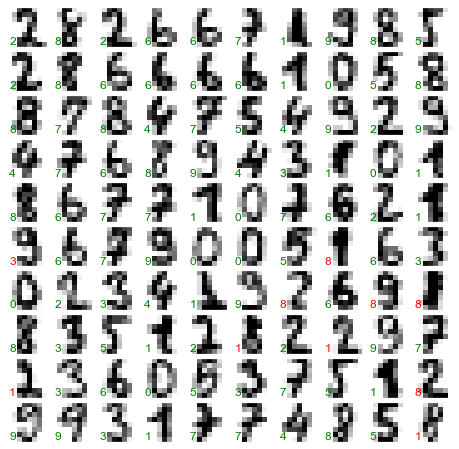

In [72]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')